# Проект (Wine Quality Prediction)

### Информация о данных

Данные представляют собой 2 csv таблицы, в которых находится информация касательно белого и красного португальского вина "Vinho Verde". 

__Количество объектов:__
красное вино - 1599; белое вино - 4898

__Признаки, имеющиеся в таблицах:__

1 - fixed acidity (фиксированная кислотность)

2 - volatile acidity (массовая концентрация летучих кислот)

3 - citric acid (лимонная кислота)

4 - residual sugar (массовая концентрация остаточного сахара)

5 - chlorides (хлориды)

6 - free sulfur dioxide (массовая концентрация свободного диоксида серы)

7 - total sulfur dioxide (массовая концентарция общего диоксида серы)

8 - density (плотность)

9 - pH (уровень pH)

10 - sulphates (сульфаты)

11 - alcohol (уровень содержания алкоголя)


__Целевая переменная:__
12 - quality (значение от 0 до 10)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

Первое, что я решил сделать с имеющимися данными - это сформировать общую матрицу объектов-признаков, соединив матрицы признаков белых и красных вин.

In [2]:
# загружаем данные через пандас
white = pd.read_csv('winequality-white.csv', sep=';')
white['type'] = 'white'

columns = white.columns

red = pd.read_csv('winequality-red.csv', sep=';')
red['type'] = 'red'

# формируем общий датасет
data = white.append(red, ignore_index=True)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Статистическое описание каждого признака в новосформированном датасете выглядит следующим образом.

In [3]:
data.describe()[1:].T

,mean,std,min,25%,50%,75%,max
fixed acidity,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


Из таблицы видно, что среднее качества вина составляет 5.8, а средний уровень содержания алкоголя остановился на отметке в 10.49.

Далее мне стало интересно посмотреть, как распределяются признаки для красных и белых вин.
Для получения необходимой информации были сформированы гистограммы распределений всех признаков вин имеющихся типов.

### Распределения признаков белого вина

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E58B171D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024E58EE00B8>]], dtype=object)

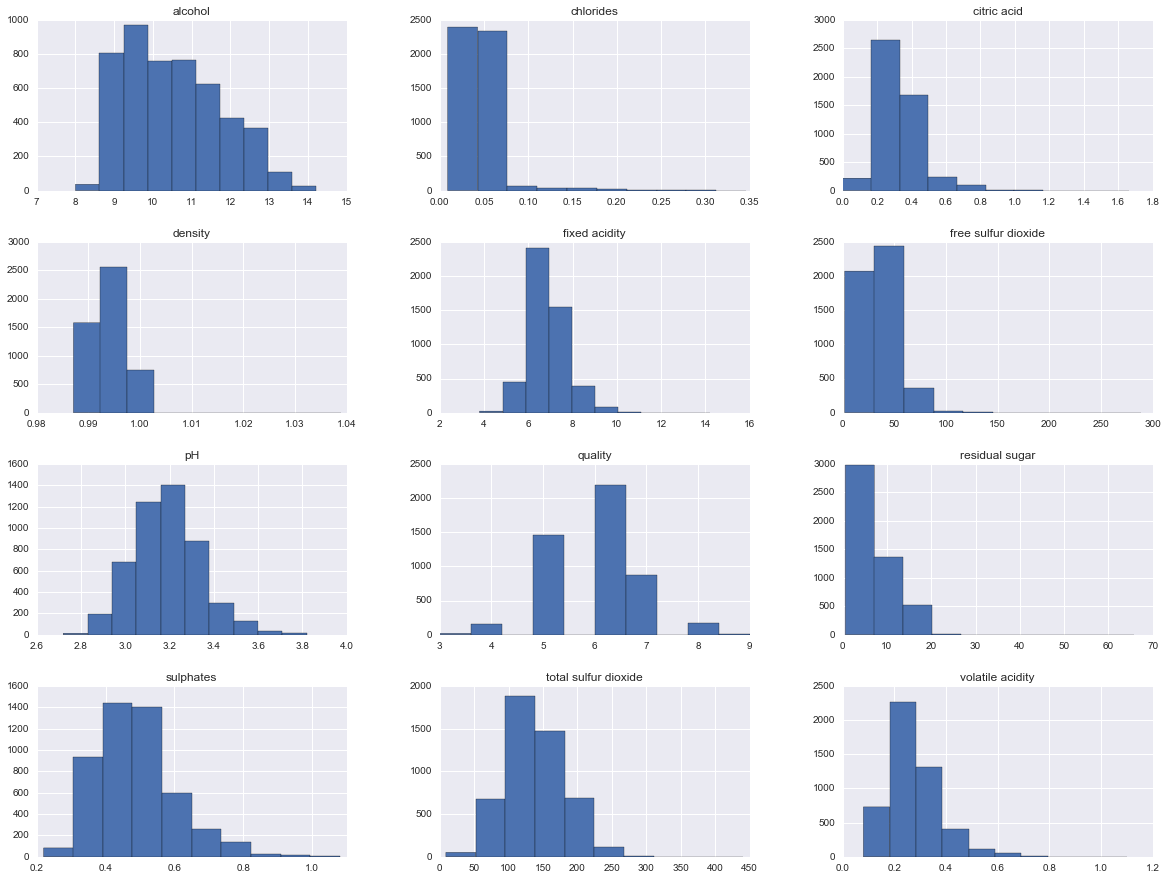

In [4]:
white.hist(figsize=(20,15))

Большинство признаков распределены нормально, но присутствует и такой вид распределения, как показательное.

### Распределения признаков красного вина

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDBB09A710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CDBAC8BCF8>]], dtype=object)

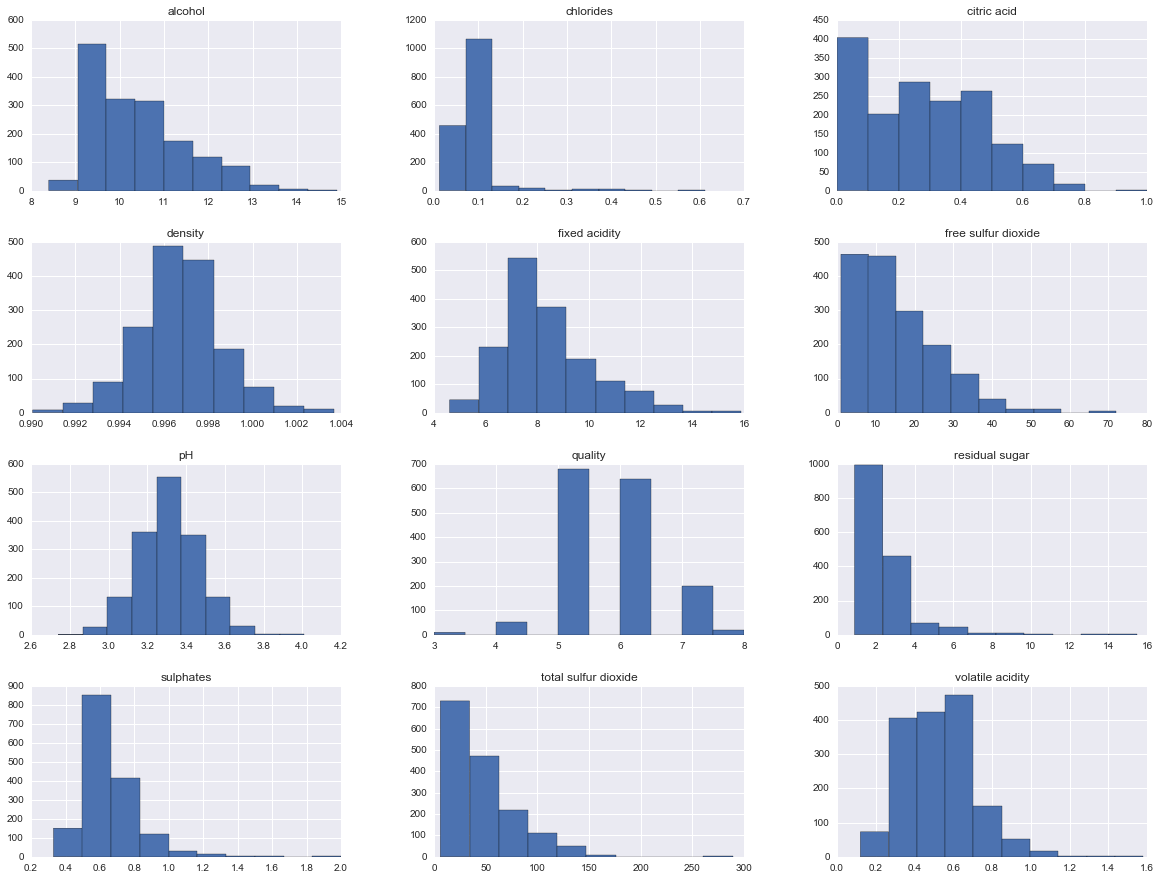

In [66]:
red.hist(figsize=(20,15))

Большинство признаков красного вина также распределены нормально.

Выбрав качество вина как целевую переменную, интересно посмотреть, насколько сильно качество бутылки вина зависит от имеющихся признаков (например, alcohol, citric acid и всех остальных), как эти признаки коррелируют друг с другом и с нашей целевой переменной.

Нарисуем графики зависимости качетсва вин разного типа от имеющихся признаков.

### Графики зависимости качества белого и красного вина от других признаков

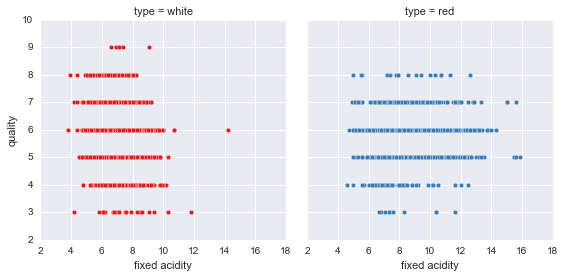

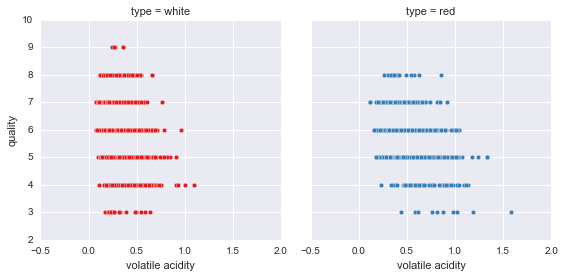

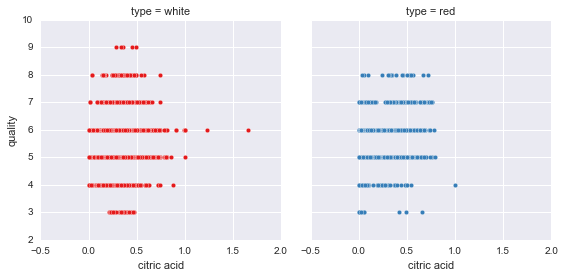

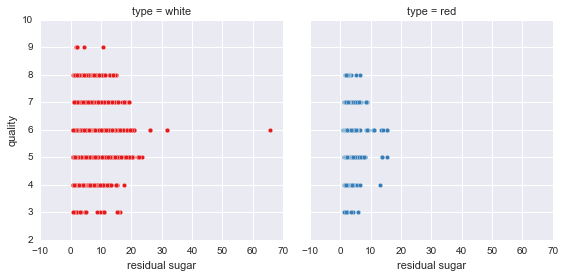

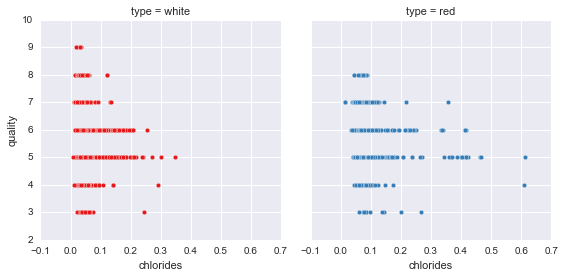

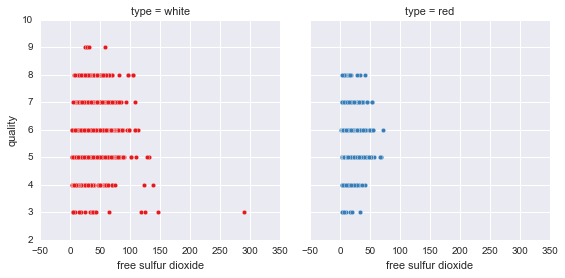

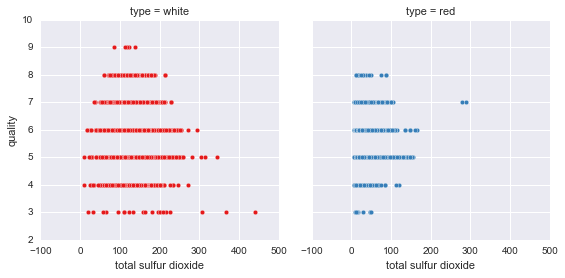

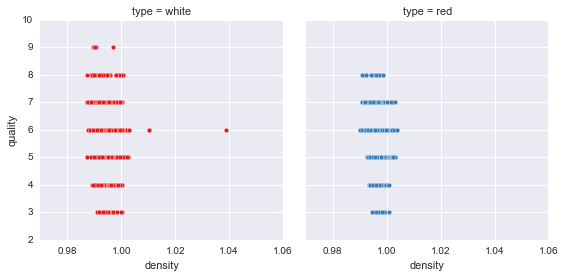

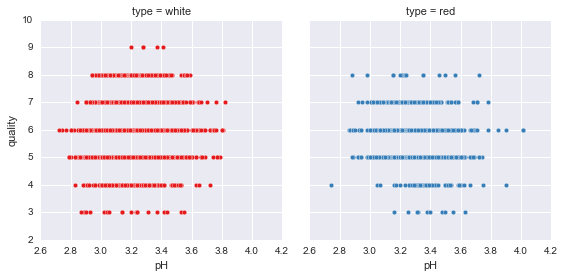

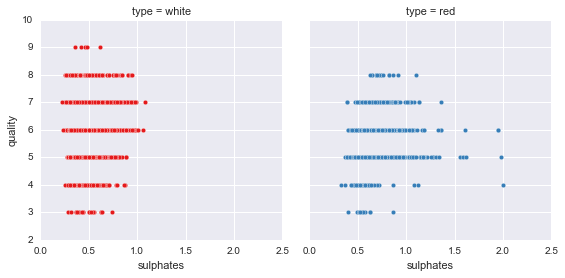

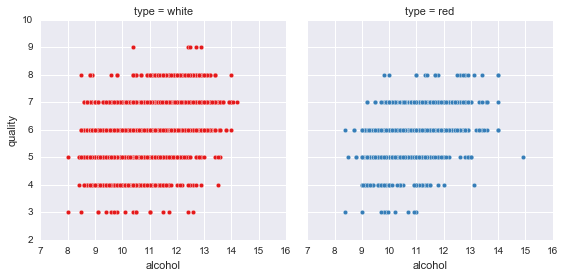

In [5]:
for quality, feature in enumerate(data.columns[:-2]):
    sns.FacetGrid(data, col='type', hue='type', size=4, palette="Set1") \
    .map(plt.scatter, feature, 'quality', edgecolor='w')

Из графиков можно сделать по крайней мере один вывод: величина уровня алкоголя каким-то образом влияет на качество вина.

### График качества вина в зависимости от citric acid и alcohol

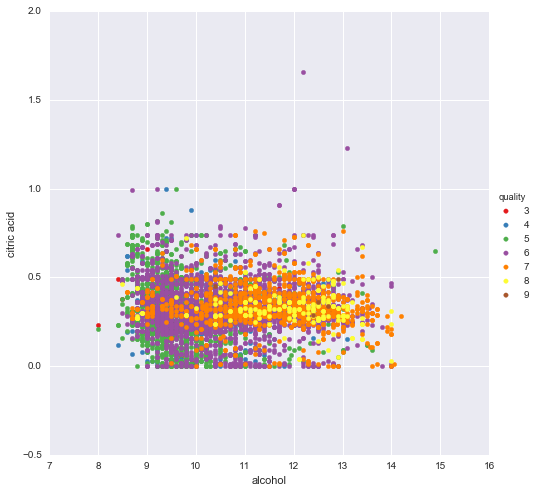

In [6]:
plt.figure(figsize=(30, 15))
sns.FacetGrid(data, hue='quality', size=7, palette='Set1')\
.map(plt.scatter, 'alcohol' , 'citric acid')\
.add_legend()

Так, для высококачественных вин(8-9) уровень содержания алкоголя находится в промежутке [11.5-13], а для вин низкого качества(3-4) - [8.5-10].
                             Что ж, посмотрим на корреляции.

### Графики попарной зависимости признаков вин

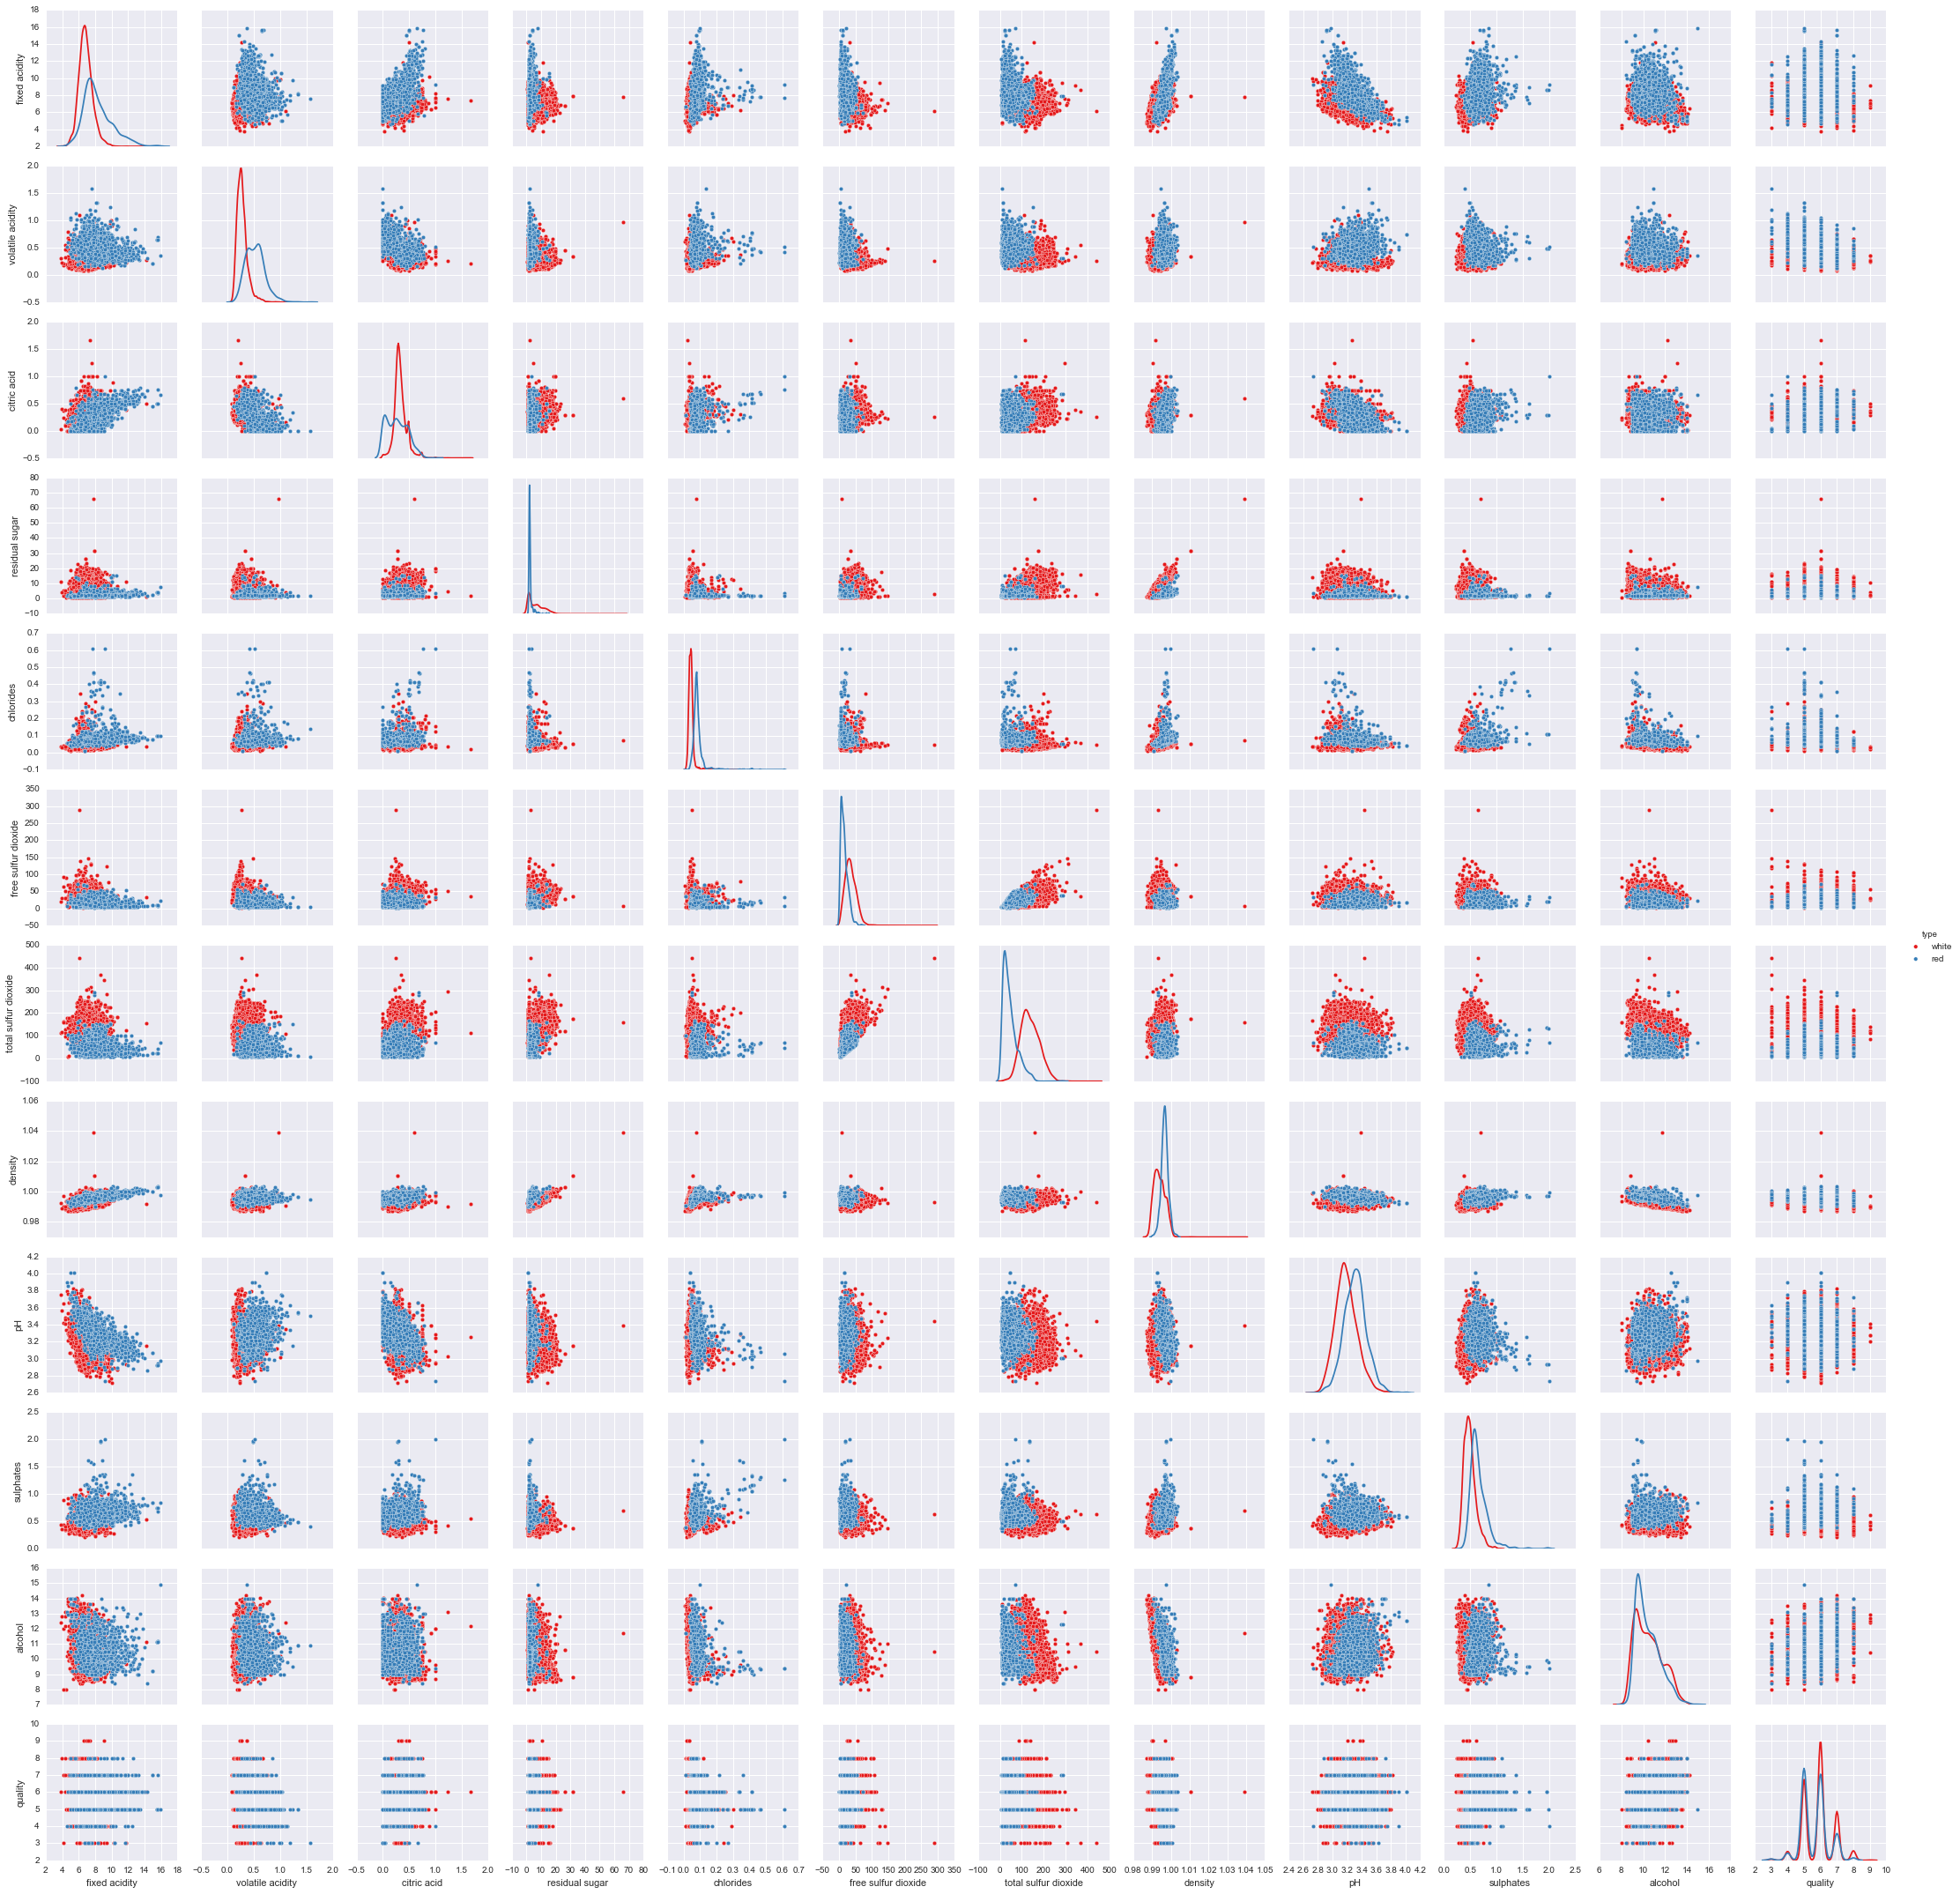

In [7]:
sns.pairplot(data, hue='type', diag_kind='kde',palette="Set1")

### Попарные корреляции признаков

In [6]:
pair_correlation = data[data.columns[:-1]].corr()
pair_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


### Корреляции признаков с quailty

In [7]:
correlation_with_quality = data[data.columns[:-2]].corrwith(data.quality)
correlation_with_quality

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
dtype: float64

Действительно, признак __alcohol__ выделяется среди всех остальных, он больше всех коррелирует с нашей целевой переменной. Еще одним интересным фактом является то, что среди наших признаков есть явно __зависимые__ (например, корреляция free sulfur dioxide и total sulfur dioxide составляет 0.72). Такие данные могут негативно повлиять на наши результаты при дальшейшем решении задачи.

Проведем масштабирование признаков и определим нашу целевую переменную

In [5]:
# Стандартизируем признаки
X = scale(data[data.columns[:-2]])

# Определяем целевую переменную
y = data.quality

data = shuffle(data)

Сохраняем данные в csv файлы

In [6]:
#data.to_csv('матрица объекты-признаки.csv')
#np.savetxt('матрица объекты-признаки (отмаштабированная).csv', X)

In [6]:
X.shape

(6497, 11)

# Работа с алгоритмами

In [7]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
fVotingClassifierm sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [9]:
param_grid = {'criterion' : ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : np.arange(1, 21, 1),
             'class_weight' : [None, 'balanced']
             }

gridCV = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)

pred = gridCV.predict(X_test)
class_weight, criterion = gridCV.best_params_['class_weight'], gridCV.best_params_['criterion']
max_depth, max_features =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features']

gridCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto'}

In [19]:
forest = RandomForestClassifier(n_estimators=500, class_weight = class_weight, criterion=criterion, max_depth=max_depth, max_features=max_features, n_jobs=-1).fit(X_train, y_train)
predicted = forest.predict(X_test)
print('F-мера: ', round(f1_score(y_test, predicted, average='micro'), 3))

F-мера:  0.699


Среди всех алгоритмов случайный лес показывает лучший результат. 
Это может быть связано с самой особенностью алгоритма (он представляет
из себя композицию деревьев принятия решений), а также с тем, что в данных практически отсутствуют шумы и полностью отсутствуют пропуски.

### Feature Importances

<a list of 11 Text xticklabel objects>

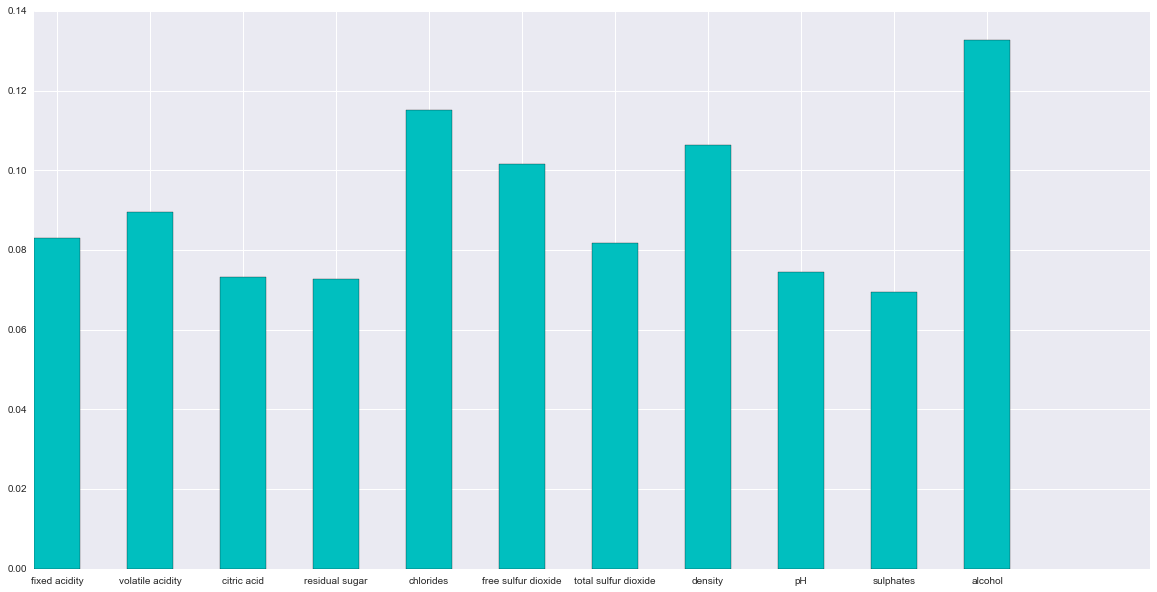

In [21]:
importance = forest.feature_importances_

plt.figure(figsize=(20,10))
idx = np.arange(importance.size)
width = 0.5
p1 = plt.bar(idx, importance, width, color='c')
plt.xticks(idx+width/2, (data.columns[:-1]))[1]

Благодаря случайному лесу получилось узнать, что в основной список важных признаков входят alcohol, volatile acidity, density, free sulphur dioxide и chlorides.

## Decision Tree

In [22]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : np.arange(1, 41, 1),
              'class_weight' : [None, 'balanced']
             }

gridCV = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)

pred = gridCV.predict(X_test)
class_weight, criterion = gridCV.best_params_['class_weight'], gridCV.best_params_['criterion']
max_depth, max_features =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features']

gridCV.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 37,
 'max_features': 'sqrt'}

In [26]:
tree = DecisionTreeClassifier(criterion=criterion, class_weight=class_weight, max_features=max_features, max_depth=max_depth).fit(X_train, y_train)
predicted = tree.predict(X_test)
print('F1-мера: ', round(f1_score(y_test, predicted, average='micro'), 3))

F1-мера:  0.625


## KNN

In [30]:
param_grid = {'n_neighbors' : np.arange(2, 36, 6),
              'weights' : ['uniform', 'distance'],
              'leaf_size' : np.arange(10, 90, 10),
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
gridCV = GridSearchCV(KNeighborsClassifier(), n_jobs=-1, param_grid=param_grid, cv=3)
gridCV.fit(X_train, y_train)

pred = gridCV.predict(X_test)
leaf_size, n_neighbors, weights, algorithm = gridCV.best_params_['leaf_size'], gridCV.best_params_['n_neighbors'], gridCV.best_params_['weights'], gridCV.best_params_['algorithm']
gridCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 26,
 'weights': 'distance'}

In [31]:
knn = KNeighborsClassifier(algorithm=algorithm, n_jobs=-1, n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size).fit(X_train, y_train)
print('F-мера: ', round(f1_score(y_test, knn.predict(X_test), average='micro'), 3))

F-мера:  0.682


По сравнению со всеми остальными классификаторами KNN показывает достаточно неплохой результат (который, я надеюсь, можно будет улучшить). Это и понятно. Ведь при обучении KNN просто запоминает обучающую выборку. А учитывая то, что и в обучающей, и в тестовой выборке большинство объектов принадлежат к среднему классу (5 или 6), то и метрика качества получается достаточной высокой.

### Logistic Regressioin

In [35]:
param_grid = {'C' : np.arange(1, 3.2, 0.2),
              'solver' : ['newton-cg', 'lbfgs'],
              'multi_class' : ['ovr', 'multinomial'],
              'fit_intercept' : [True, False],
             }

gridCV = GridSearchCV(LogisticRegression(), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)
C, solver, multi_class, fit_intercept = gridCV.best_params_['C'], gridCV.best_params_['solver'], gridCV.best_params_['multi_class'], gridCV.best_params_['fit_intercept'] 
gridCV.best_params_

{'C': 2.9999999999999996,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'lbfgs'}

In [37]:
logclf = LogisticRegression(C=C, solver=solver, multi_class=multi_class, fit_intercept=fit_intercept, n_jobs=-1).fit(X_train, y_train)
print('F1-мера: ', round(f1_score(y_test, logclf.predict(X_test), average='micro'), 3))

F1-мера:  0.537


## One-vs-All Multiclassification

#### Naive Bayess

In [38]:
multiclassificator = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
print('F1-мера: ', round(f1_score(y_test, multiclassificator.predict(X_test), average='micro'), 3))

F1-мера:  0.483


Качество наивного байесовского классификатора в данном случае оставляет желать лучшего. Это может быть с тем, что выборка не является сбалансированной, а значит вероятность отнести вино к среднему классу (5 или 6) выше. Также следует учесть тот факт, что наивный байесовский классификатор изначально определяет все признаки как независимые, хотя в нашем случае некоторые зависимые признаки все равно присутствуют.

### Выводы

На имеющихся данных лучший результат показывают алгоритмы Random Forest и KNN (каждый с F-мерой ~ 0.7) <br>Результаты Decision Tree, Logistic Regression и Naive Bayess оставляют желать лучшего.<br> Объяснить это можно тем, что отдельно деревья чаще всего показывают результат хуже случайного леса, где деревья используются в совокупности.<br> Логистическая регрессия же больше подходит для выборок с небольшим набором данных, а наивный байесовский классификатор плохо работает из-за наличия зависимых признаков.


#### В следующем этапе проекта буду пытаться улучшать качество работы алгоритмов!

Основываясь на важностях признаках, полученных благодаря использованию случайного леса, сформируем новую выборку, состоящую только из самых важных признаков. Возможно, это поможет улучшить наши результаты.<br> В нашу новую выборку войдут такие признаки как volatile acidity, chlorides, free sulfur dioxide, density, alcohol и наш целевой признак quality.

In [8]:
feature_names = ["volatile acidity", "chlorides", "free sulfur dioxide", "density", "alcohol", "quality"]
data = data[feature_names].copy()

Из-за того, что признаков в выборке мы оставили не очень много, попробуем усложнить модель, добавив квадраты имеющихся признаков.

In [9]:
data['volatile acidity_2'] = data['volatile acidity']**2
data['free sulfur dioxide_2'] = data['free sulfur dioxide']**2
data['chlorides_2'] = data.chlorides**2
data['density_2'] = data.density**2
data['alocohol_2'] = data.alcohol**2
data['volatile acidity_2'] = data['volatile acidity']**2

data = shuffle(data)
data.head()

,volatile acidity,chlorides,free sulfur dioxide,density,alcohol,quality,volatile acidity_2,free sulfur dioxide_2,chlorides_2,density_2,alocohol_2
693,0.37,0.036,34,0.99440,9.8,5,0.1369,1156,0.001296,0.988831,96.04
1999,0.18,0.055,32,1.00020,9.0,6,0.0324,1024,0.003025,1.000400,81.00
1143,0.24,0.048,27,0.99330,10.5,5,0.0576,729,0.002304,0.986645,110.25
6401,0.44,0.077,6,0.99555,11.0,6,0.1936,36,0.005929,0.991120,121.00
1654,0.46,0.052,19,0.99560,9.0,5,0.2116,361,0.002704,0.991219,81.00


In [10]:
# Определяем целевую переменную
y = data.quality

In [11]:
#data.drop('type', axis=1, inplace=True)
data.drop('quality', axis=1, inplace=True)
data.head()

,volatile acidity,chlorides,free sulfur dioxide,density,alcohol,volatile acidity_2,free sulfur dioxide_2,chlorides_2,density_2,alocohol_2
693,0.37,0.036,34,0.99440,9.8,0.1369,1156,0.001296,0.988831,96.04
1999,0.18,0.055,32,1.00020,9.0,0.0324,1024,0.003025,1.000400,81.00
1143,0.24,0.048,27,0.99330,10.5,0.0576,729,0.002304,0.986645,110.25
6401,0.44,0.077,6,0.99555,11.0,0.1936,36,0.005929,0.991120,121.00
1654,0.46,0.052,19,0.99560,9.0,0.2116,361,0.002704,0.991219,81.00


Из-за того, что значения признаков слишком сильно различаются, приведем их к единому масштабу.<br> Это поможет ускорить обучение моделей и снизить вероятность переобучения. <br> Также разделим нашу новую выборку на тренировочную и контрольную

In [12]:
# Масштабируем признаки
X = scale(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Далее проведем настройку алгоритмов и определим F-меру каждого алгоритма на новой тестовой выборке

## Classification

### Random Forest

In [44]:
param_grid = {'criterion' : ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : np.arange(1, 21, 1),
             'class_weight' : [None, 'balanced']
             }

gridCV = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)

pred = gridCV.predict(X_test)
class_weight, criterion = gridCV.best_params_['class_weight'], gridCV.best_params_['criterion']
max_depth, max_features =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features']

gridCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2'}

In [46]:
forest = RandomForestClassifier(n_estimators=300, class_weight = class_weight, criterion=criterion, max_depth=max_depth, max_features=max_features, n_jobs=-1).fit(X_train, y_train)
print('F-мера: ', round(f1_score(y_test, forest.predict(X_test), average='micro'), 3))

F-мера:  0.646


### Decision Tree

In [47]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : np.arange(1, 41, 1),
              'class_weight' : [None, 'balanced']
             }

gridCV = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)

pred = gridCV.predict(X_test)
class_weight, criterion = gridCV.best_params_['class_weight'], gridCV.best_params_['criterion']
max_depth, max_features =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features']

gridCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 26,
 'max_features': 'log2'}

In [48]:
tree = DecisionTreeClassifier(criterion=criterion, class_weight=class_weight, max_features=max_features, max_depth=max_depth).fit(X_train, y_train)
print('F1-мера: ', round(f1_score(y_test, tree.predict(X_test), average='micro'), 3))

F1-мера:  0.592


### KNN

In [49]:
param_grid = {'n_neighbors' : np.arange(2, 36, 6),
              'weights' : ['uniform', 'distance'],
              'leaf_size' : np.arange(10, 90, 10),
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
gridCV = GridSearchCV(KNeighborsClassifier(), n_jobs=-1, param_grid=param_grid, cv=3)
gridCV.fit(X_train, y_train)

pred = gridCV.predict(X_test)
leaf_size, n_neighbors, weights, algorithm = gridCV.best_params_['leaf_size'], gridCV.best_params_['n_neighbors'], gridCV.best_params_['weights'], gridCV.best_params_['algorithm']
gridCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 32,
 'weights': 'distance'}

In [51]:
knn = KNeighborsClassifier(algorithm=algorithm, n_jobs=-1, n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size).fit(X_train, y_train)
print('F-мера: ', round(f1_score(y_test, knn.predict(X_test), average='micro'), 3))

F-мера:  0.654


### Logistic Regression

In [52]:
param_grid = {'C' : np.arange(1, 3.2, 0.2),
              'solver' : ['newton-cg', 'lbfgs'],
              'multi_class' : ['ovr', 'multinomial'],
              'fit_intercept' : [True, False],
             }

gridCV = GridSearchCV(LogisticRegression(), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)
C, solver, multi_class, fit_intercept = gridCV.best_params_['C'], gridCV.best_params_['solver'], gridCV.best_params_['multi_class'], gridCV.best_params_['fit_intercept'] 
gridCV.best_params_

{'C': 2.1999999999999997,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [53]:
logclf = LogisticRegression(C=C, solver=solver, multi_class=multi_class, fit_intercept=fit_intercept, n_jobs=-1).fit(X_train, y_train)
print('F1-мера: ', round(f1_score(y_test, logclf.predict(X_test), average='micro'), 3))

F1-мера:  0.519


### Bayess

In [13]:
multiclassificator = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
print('F1-мера: ', round(f1_score(y_test, multiclassificator.predict(X_test), average='micro'), 3))

F1-мера:  0.444


### Classifiers Composition

Для улучшения качества на данных с новыми признаками, попробуем использовать композицию алгоритмов. Разумным кажется использовать вместе те алгоритмы, которые показали лучший результат до этого. Поэтому в композиции мы будем использовать случайный лес и knn.

In [68]:
# Попытался настроить каждый алгоритм в композиции на кросс-валидации
# но обучается все это ну оочень долго (мб проблема в моем железе, не знаю)
# в итоге решил использовать уже настроенные алгоритмы

#from sklearn.ensemble import VotingClassifier
#eclf = VotingClassifier(estimators=[('f', forest), ('knn', knn)], voting ='soft')
#
#param_grid = {'f__criterion' : ['gini', 'entropy'], 
#             'f__max_depth' : np.arange(1, 21, 1),
#             'f__class_weight' : [None, 'balanced'],
#             'knn__n_neighbors' : np.arange(2, 36, 6),
#             'knn__weights' : ['uniform', 'distance'],
#             'knn__leaf_size' : np.arange(30, 90, 10),
#             'knn__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
#             'log__C' : np.arange(1, 3.2, 0.2),
#             'log__multi_class' : ['ovr', 'multinomial']}
#                                    
#param_grid = {'f__criterion' : ['gini', 'entropy'], 
#             'f__max_depth' : np.arange(1, 21, 1),
#             'f__class_weight' : [None, 'balanced'],
#             'knn__n_neighbors' : np.arange(2, 36, 6)}
#
#grid = GridSearchCV(estimator=eclf, param_grid=param_grid, cv=3, n_jobs=-1)
#grid.get_params().keys()
#
#grid.fit(X_train[:400], y_train[:400])

In [14]:
from sklearn.ensemble import VotingClassifier, ExtraTreesRegressor
eclf_1 = VotingClassifier(estimators=[('f', forest), ('knn', knn)], voting ='soft')
eclf_1.fit(X_train, y_train)
predicted_1 = eclf_1.predict(X_test)
print('F1-мера: ', round(f1_score(y_test, predicted_1, average='micro'), 3))

NameError: name 'forest' is not defined

Возможно, получится улучшить результат, если попробовать использовать в композиции все имеющиеся классификаторы. Добавим к композиции логистическую регресиию. Решающее дерево мы добавлять не будем, потому что случайный лес уже включает в себя их использование.

In [72]:
eclf_2 = VotingClassifier(estimators=[('f', forest), ('knn', knn), ('log_clf', logclf)], voting ='soft')
eclf_2.fit(X_train, y_train)
predicted_2 = eclf_2.predict(X_test)
print('F1-мера: ', round(f1_score(y_test, predicted_2, average='micro'), 3))

F1-мера:  0.667


Как видно, качество может немного улучшиться

## Regression

Попробуем на новых данных сделать регрессию с дальнейшим округлением результатов (порог 0.5). Так, например, если для объекта алгоритм выдал результат 5.58, то мы будем относить этот объект к классу 6. Для каждого алгоритма будем строить гистограммы распределений ответов и также смотреть F-меру.

### Random Forest

In [17]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : np.arange(1, 21, 1)
             }

gridCV = GridSearchCV(RandomForestRegressor(n_estimators=100), param_grid, n_jobs=-1, cv=3)
gridCV.fit(X_train, y_train)

pred = np.round(gridCV.predict(X_test))
max_depth, max_features =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features']

gridCV.best_params_

{'max_depth': 19, 'max_features': 'log2'}

In [18]:
forest = RandomForestRegressor(n_estimators=500, max_depth=max_depth, max_features=max_features, n_jobs=-1).fit(X_train, y_train)
predicted = np.round(forest.predict(X_test))
print('F-мера: ', round(f1_score(y_test, predicted, average='micro'), 3))

F-мера:  0.648


(array([    3.,     0.,   640.,     0.,     0.,  1039.,     0.,   254.,
            0.,    14.]),
 array([ 4. ,  4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ]),
 <a list of 10 Patch objects>)

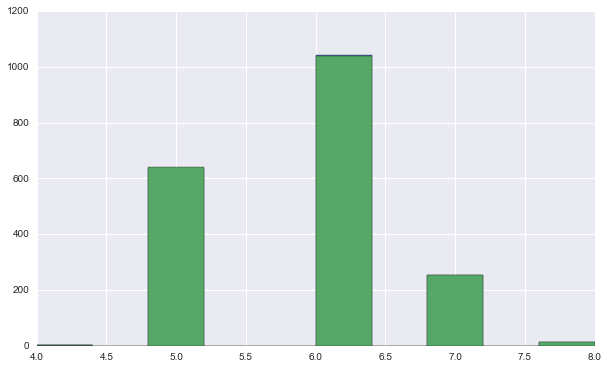

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(pred)
plt.hist(predicted)

### Decision Tree

In [20]:
param_grid = {'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : np.arange(1, 41, 1),
              'presort' : [True, False]
             }

gridCV = GridSearchCV(DecisionTreeRegressor(), param_grid, n_jobs=-1)
gridCV.fit(X_train, y_train)

pred = np.round(gridCV.predict(X_test))
max_depth, max_features, presort =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features'], gridCV.best_params_['presort']

gridCV.best_params_

{'max_depth': 5, 'max_features': 'auto', 'presort': False}

In [22]:
tree = DecisionTreeRegressor(max_features=max_features, max_depth=max_depth, presort=presort).fit(X_train, y_train)
predicted = np.round(tree.predict(X_test))
print('F1-мера: ', round(f1_score(y_test, predicted, average='micro'), 3))

F1-мера:  0.522


(array([    2.,     0.,     0.,   542.,     0.,     0.,  1248.,     0.,
            0.,   158.]),
 array([ 4. ,  4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ]),
 <a list of 10 Patch objects>)

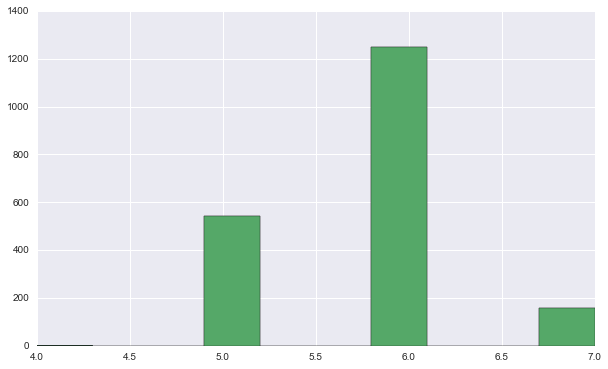

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(pred)
plt.hist(predicted)

### KNN

In [24]:
param_grid = {'n_neighbors' : np.arange(2, 36, 6),
              'weights' : ['uniform', 'distance'],
              'leaf_size' : np.arange(10, 90, 10),
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

gridCV = GridSearchCV(KNeighborsRegressor(), n_jobs=-1, param_grid=param_grid, cv=3)
gridCV.fit(X_train, y_train)

pred = np.round(gridCV.predict(X_test))
leaf_size, n_neighbors, weights, algorithm = gridCV.best_params_['leaf_size'], gridCV.best_params_['n_neighbors'], gridCV.best_params_['weights'], gridCV.best_params_['algorithm']
gridCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 32,
 'weights': 'distance'}

In [25]:
knn = KNeighborsRegressor(algorithm=algorithm, n_jobs=-1, n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size).fit(X_train, y_train)
predicted = np.round(knn.predict(X_test))
print('F-мера: ', round(f1_score(y_test, predicted, average='micro'), 3))

F-мера:  0.648


(array([    6.,     0.,   613.,     0.,     0.,  1065.,     0.,   245.,
            0.,    21.]),
 array([ 4. ,  4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ]),
 <a list of 10 Patch objects>)

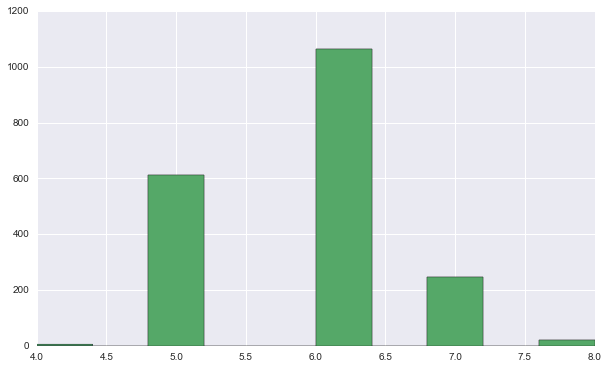

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(pred)
plt.hist(predicted)

### Extra Trees Regressor

Для регрессии попробовал использовать алгоритм ExtraTreesRegressor, который отличает от решающего дерева тем, что строит деревья абсолютно случайным образовм.

In [27]:
param_grid = {'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : np.arange(1, 41, 1),
              'bootstrap' : [True, False]
             }

gridCV = GridSearchCV(ExtraTreesRegressor(n_estimators=100), param_grid, n_jobs=-1, cv=3)
gridCV.fit(X_train, y_train)

pred = np.round(gridCV.predict(X_test))
max_depth, max_features, bootstrap =  gridCV.best_params_['max_depth'], gridCV.best_params_['max_features'], gridCV.best_params_['bootstrap']

gridCV.best_params_

{'bootstrap': False, 'max_depth': 37, 'max_features': 'sqrt'}

In [28]:
extr = ExtraTreesRegressor(n_estimators=500, max_features=max_features, max_depth=max_depth, bootstrap=bootstrap).fit(X_train, y_train)
predicted = np.round(extr.predict(X_test))
print('F-мера: ', round(f1_score(y_test, predicted, average='micro'), 3))

F-мера:  0.662


Как оказалось, данный алгорим выдает достаточно неплохое значение F-меры, наряду с knn и случайным лесом.

## Выводы по проекту:

С формированием новых данных, настройкой каждого алгоритма на кросс-валидации а также использованием композиций некоторых алгоритмов мне все-таки не особо удалось улучшить качество классификации. Лучшим результатом из работы всех алгоритов все равно остается F-мера со значением ~ 0.7 <br>
Скорее всего такой результат связан с особенностями самих данных. Тем не менее, результат __F-меры ~ 0.7__ я считаю довольно успешным.<br><br>
Оказалось, с данным датасетом проводились соревнования с использованием платформы kaggle-in-class. <br> Ссылка: https://inclass.kaggle.com/c/aalto-wine-quality-prediction-t-61-3050-challenge/leaderboard/public <br> 
Метрикой качества там также выступала F-мера и лучший результат на соревровании оказался __0.712__ <br>
Поэтому можно сказать, что мой результат не так уж и плох :) <br> <br> _В любом случае, мне было интересно заниматься этим проектом. Благодаря ему мне удалось познакомиться с новыми алгоритмами, методами их настройки и научиться применять полученные знания на практике._